In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_MNIST(train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[5] = 18
idx_small[6] = 21
idx_small[9] = 61
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [4]:
sp_o = 0.05
sp_w = 0.001
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_11_14_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST/AsymAE_infoGAN/')

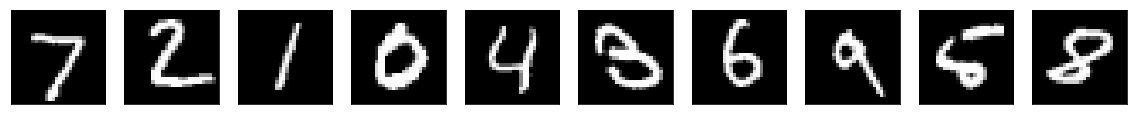

In [5]:
bastien_utils.plot_all_images(x_small)

In [6]:
x_small_rec = AE.reconstruction(x_small)

In [7]:
x_test_rec = AE.reconstruction(x_test)

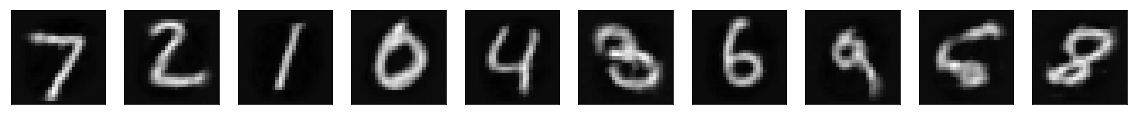

In [8]:
bastien_utils.plot_all_images(x_small_rec)

In [12]:
print("MSE without cropping: ", np.mean(np.square(x_test_rec - x_test)))

MSE without cropping:  0.00784850907107165


In [10]:
x_test_rec_clipped = np.clip(x_test_rec, 0, 1)

In [21]:
AE.__class__

AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN.Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint

In [ ]:
new_weights = n

In [25]:
old_weights = AE.encoder.get_weights()

In [27]:
len(old_weights)

16

In [28]:
AE_bis = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint()

In [29]:
AE_bis.copy_AE_weights(AE)

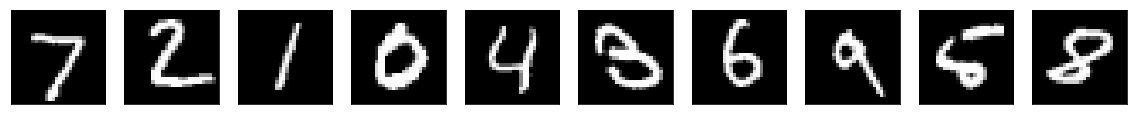

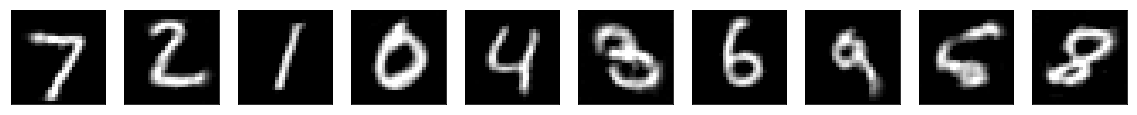

In [30]:
AE_bis.plot_reconstructions(x_small)

In [31]:
AE.train(x_test[:10], X_train_expected_output=x_test[10:20], nb_epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 143ms/step - loss: 0.1171 - mean_squared_error: 0.1160
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0943 - mean_squared_error: 0.0940
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0886 - mean_squared_error: 0.0880
Epoch 4/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0864 - mean_squared_error: 0.0858
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0818 - mean_squared_error: 0.0809
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0808 - mean_squared_error: 0.0800
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0728 - mean_squared_error: 0.0718
Epoch 8/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0710 - mean_squared_error: 0.0700
Epoch 9/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0673 - mean_squared_error: 0.0663
Epoch 10/

Epoch 75/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0225 - mean_squared_error: 0.0206
Epoch 76/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0236 - mean_squared_error: 0.0220
Epoch 77/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0224 - mean_squared_error: 0.0205
Epoch 78/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0225 - mean_squared_error: 0.0209
Epoch 79/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0210 - mean_squared_error: 0.0191
Epoch 80/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0210 - mean_squared_error: 0.0194
Epoch 81/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0199 - mean_squared_error: 0.0180
Epoch 82/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0200 - mean_squared_error: 0.0184
Epoch 83/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0192 - mean_squared_error: 0.0173
E

In [14]:
print("MSE after clipping: ", np.mean(np.square(x_test_rec_clipped - x_test)))

MSE after clipping:  0.00710826101928327


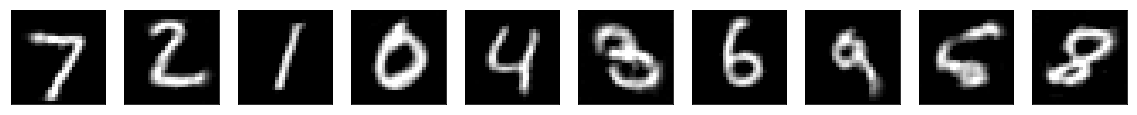

In [15]:
bastien_utils.plot_all_images(x_test_rec_clipped[idx_small])

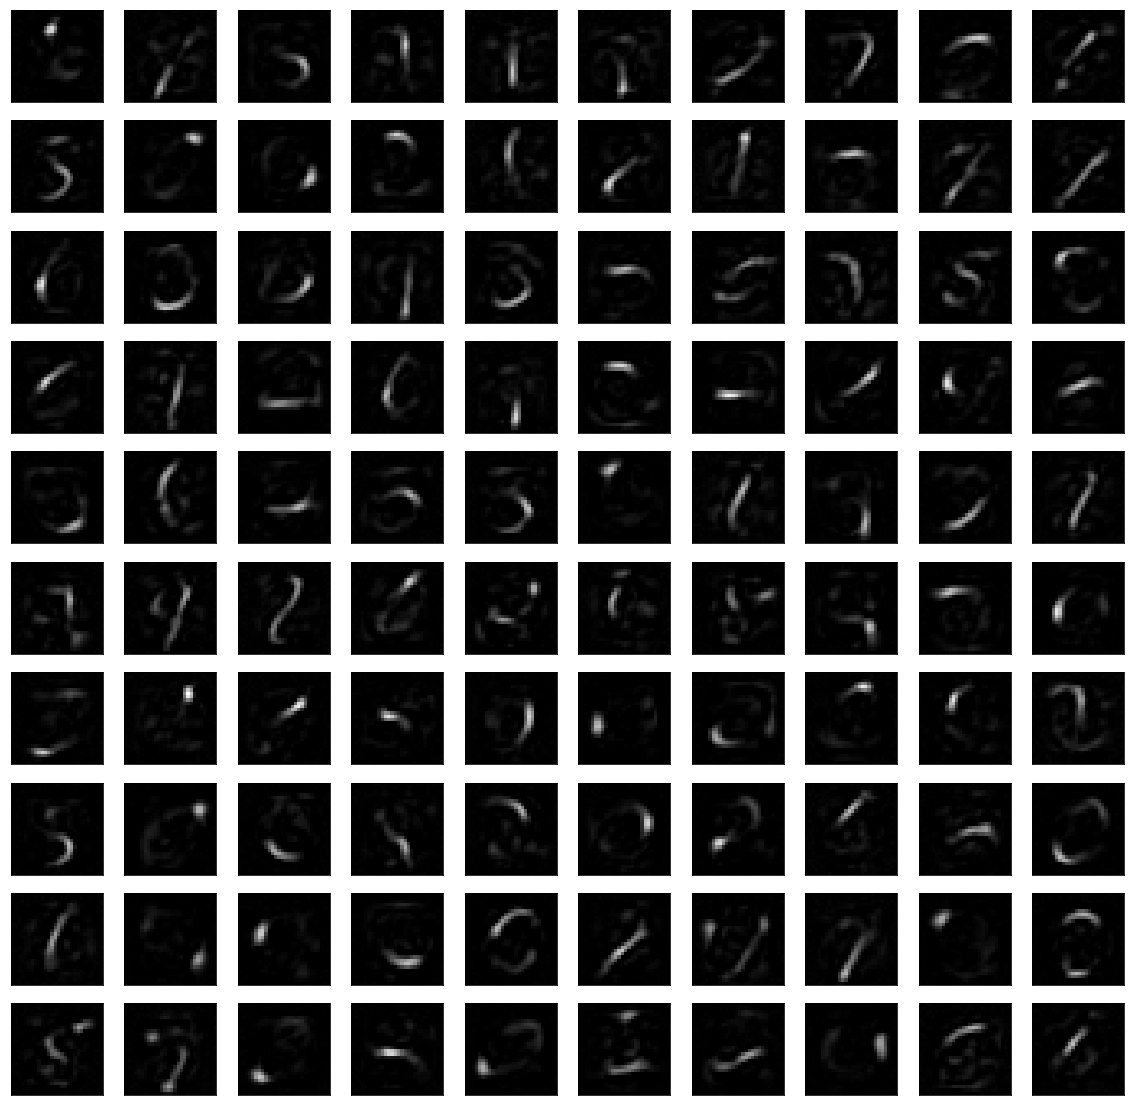

In [16]:
AE.plot_atoms_decoder()

In [15]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

In [16]:
max_approx_x_test = AE_dil.reconstruction(x_test)

In [19]:
np.min(max_approx_x_test)

-0.05134294

In [20]:
np.max(max_approx_x_test)

3.647108

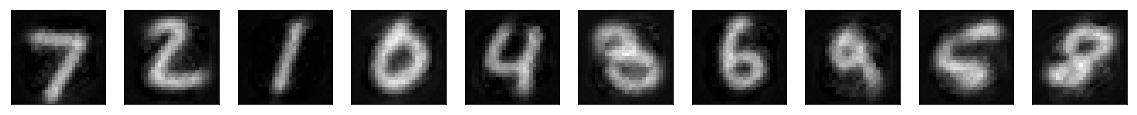

In [19]:
bastien_utils.plot_all_images(max_approx_x_test[idx_small])

In [20]:
max_approx_x_test_clipped = np.clip(max_approx_x_test, 0, 1)

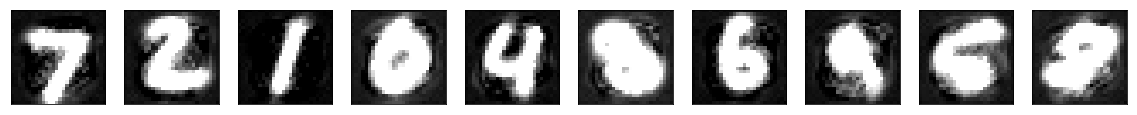

In [23]:
bastien_utils.plot_all_images(max_approx_x_test_clipped[idx_small])

In [22]:
x_test_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

In [25]:
print("MSE without clipping: ", np.mean(np.square(max_approx_x_test - x_test_dil)))

MSE without clipping:  0.28650566490461615


In [25]:
max_approx_x_test_clipped = np.clip(max_approx_x_test, 0, 1)

In [26]:
print("MSE without clipping: ", np.mean(np.square(max_approx_x_test_clipped - x_test_dil)))

MSE without clipping:  0.06921647317091784


In [27]:
AE.max_approximation_error(x_test, morphoMaths.dilatation, clipped_max_approx=True, SE_scale=1)

(0.06921647317091784, 0.06208595511405306)

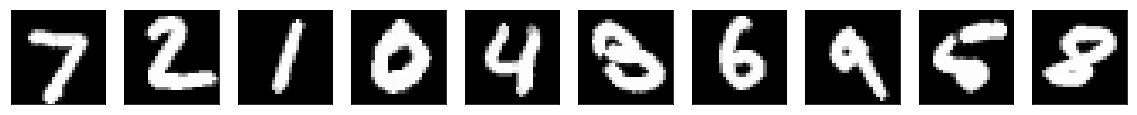

In [27]:
bastien_utils.plot_all_images(x_test_dil[idx_small])

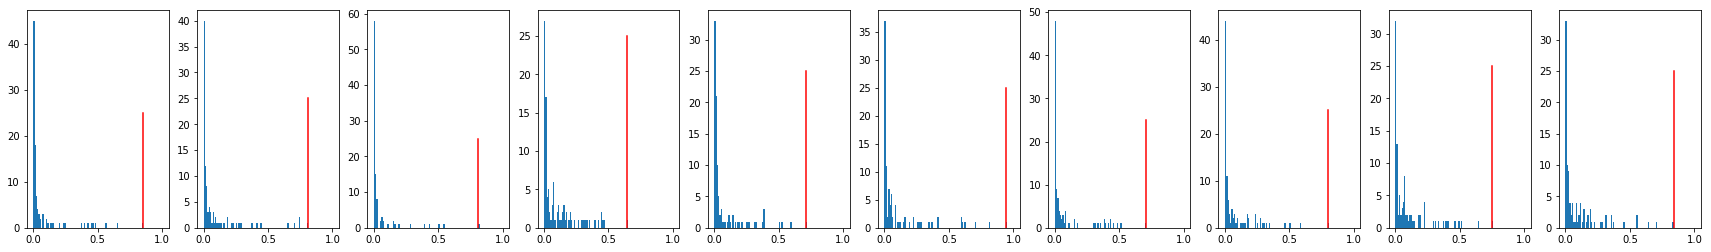

In [28]:
AE.plot_histograms_of_the_encoding(x_small)

In [5]:
AE.sparsity_measure(x_test)

0.5381872